# salary Prediction

In [1]:
#importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing the data set

In [7]:
df=pd.read_csv("salary.csv")
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [8]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [10]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [18]:
df['salary'].unique

<bound method Series.unique of 0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 397, dtype: int64>

In [21]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [22]:
#checking for null values

In [23]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [74]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [75]:
#encoding of data set to make numerical data set

In [77]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [81]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
df       

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


In [82]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [24]:
#visualize the null values using heatmap

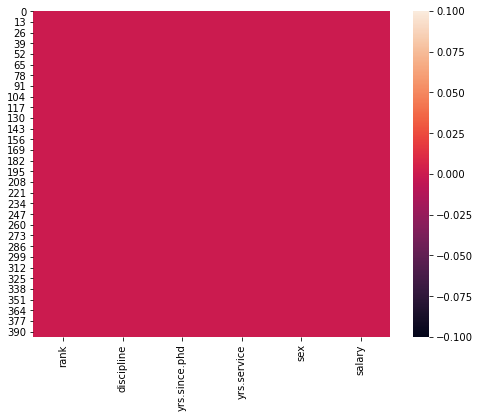

In [83]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull())
plt.show()

In [26]:
#checking for the skewness

In [84]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

In [29]:
#vizualise the skewness 

skewness: 0.3008795513246012


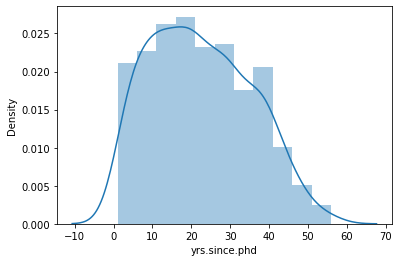

In [85]:
sns.distplot(df['yrs.since.phd'])
print('skewness:',df['yrs.since.phd'].skew())

skewness: 0.6505694795470155


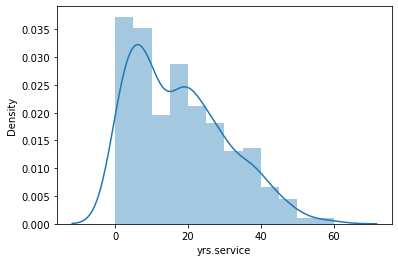

In [86]:
sns.distplot(df["yrs.service"])
print('skewness:', df['yrs.service'].skew())

skewness: 0.71456845319916


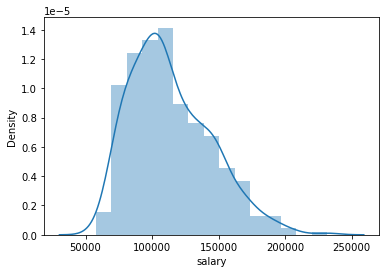

In [87]:
sns.distplot(df["salary"])
print('skewness:', df['salary'].skew())

skewness: -2.7099583549309574


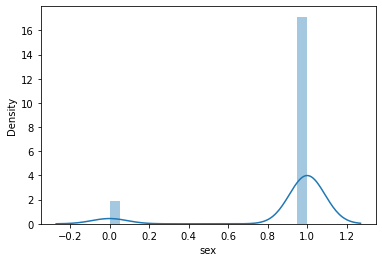

In [89]:
sns.distplot(df["sex"])
print('skewness:', df['sex'].skew())

skewness: -0.1776837175451539


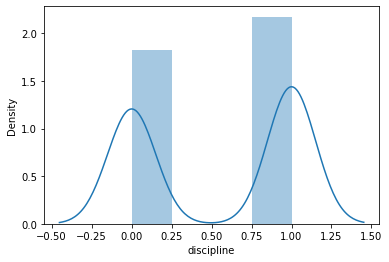

In [90]:
sns.distplot(df["discipline"])
print('skewness:', df['discipline'].skew())

skewness: -1.1511635371129003


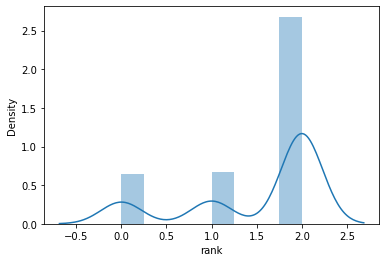

In [91]:
sns.distplot(df["rank"])
print('skewness:', df['rank'].skew())

rank                AxesSubplot(0.125,0.536818;0.168478x0.343182)
discipline       AxesSubplot(0.327174,0.536818;0.168478x0.343182)
yrs.since.phd    AxesSubplot(0.529348,0.536818;0.168478x0.343182)
yrs.service      AxesSubplot(0.731522,0.536818;0.168478x0.343182)
sex                    AxesSubplot(0.125,0.125;0.168478x0.343182)
salary              AxesSubplot(0.327174,0.125;0.168478x0.343182)
dtype: object

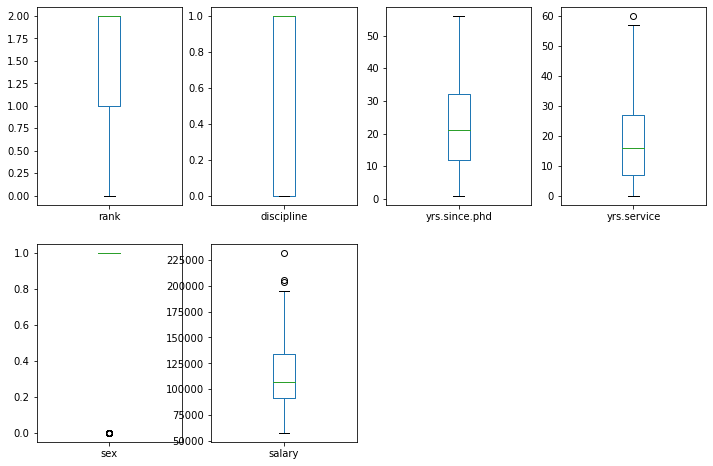

In [92]:
df.plot(kind='box', subplots=True, layout=(2,4), figsize=(12,8))

outliers are there

In [93]:
#Now remove the outliers using zscore

In [94]:
import scipy.stats
from scipy.stats import zscore

In [95]:
z=np.abs(zscore(df))

In [96]:
z

array([[0.64925739, 0.91540317, 0.25754973, 0.02966908, 0.3300584 ,
        0.86091884],
       [0.64925739, 0.91540317, 0.17985426, 0.12429986, 0.3300584 ,
        1.96667226],
       [0.67256406, 0.91540317, 1.42298184, 1.12509795, 0.3300584 ,
        1.12249537],
       ...,
       [0.64925739, 1.09241483, 1.52944617, 0.56856036, 0.3300584 ,
        0.39564018],
       [0.64925739, 1.09241483, 0.20862311, 0.20128433, 0.3300584 ,
        0.60750187],
       [0.67256406, 1.09241483, 1.11219995, 1.04811348, 0.3300584 ,
        1.08001725]])

In [97]:
threshold=3
df=df[(z<3).all(axis=1)]
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


In [61]:
# pass the data into ML


In [98]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [99]:
x=df.drop(['salary'], axis=1)
x

,rank,discipline,yrs.since.phd,yrs.service,sex
0,2.0,1.0,19,18,1.0
1,2.0,1.0,20,16,1.0
2,1.0,1.0,4,3,1.0
3,2.0,1.0,45,39,1.0
4,2.0,1.0,40,41,1.0
...,...,...,...,...,...
392,2.0,0.0,33,30,1.0
393,2.0,0.0,31,19,1.0
394,2.0,0.0,42,25,1.0
395,2.0,0.0,25,15,1.0


In [100]:
y=df["salary"]

In [101]:
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 354, dtype: int64

In [125]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=100)

In [126]:
x_train.shape

(265, 5)

In [127]:
y_train.shape

(265,)

In [128]:
x_test.shape

(89, 5)

In [129]:
y_test.shape

(89,)

In [130]:
#passing the data into Linear Regression

In [131]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [132]:
lr.coef_

array([14743.18255769, 10271.07537764,  1309.19975987,  -942.7956315 ,
           0.        ])

In [133]:
lr.intercept_

72538.46742174201

In [134]:
#predicting the values

In [135]:
pred=lr.predict(x_test)
print('Score:', lr.score(x_train,y_train))

Score: 0.32092857649629547
